In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,NaN,3.43440,2.79240,NaN,1.69910,3.815600,1.74640
1,-0.098505,-0.17857,2.062800,2.92160,NaN,1.1785,1.68020,1.38880,3.21670,NaN,0.772910,0.64145
2,NaN,0.50153,2.470900,3.06500,1.567600,1.4824,0.92160,2.64240,1.51870,2.53180,NaN,1.87680
3,-0.136050,0.47279,0.588090,1.95630,NaN,2.5957,2.89330,1.53750,0.99942,3.65930,0.618250,3.26580
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.2711,0.37425,2.17860,1.31400,1.06320,NaN,2.18840
...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,-2.68670,1.576000,0.55612,0.070769,2.0747,0.80304,NaN,3.49330,1.32550,3.231100,NaN
796,3.466600,-4.03460,3.100400,1.34610,1.377300,NaN,0.39613,2.39610,NaN,1.66750,NaN,NaN
797,3.344800,NaN,2.031000,NaN,3.341200,1.5370,1.22560,0.74027,2.49540,1.34330,1.622500,1.58530
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.4243,0.81081,3.72700,1.18790,0.95112,NaN,1.14370


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	237
float64		column 2	211
float64		column 3	104
float64		column 4	104
float64		column 5	133
float64		column 6	104
float64		column 7	133
float64		column 8	78
float64		column 9	130
float64		column 10	263
float64		column 11	237
float64		column 12	156


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,563.000000,589.000000,696.000000,696.000000,667.000000,696.000000,667.000000,722.000000,670.000000,537.000000,563.000000,644.000000
mean,1.503101,1.282324,1.978445,1.934553,1.995572,2.007014,1.960268,1.991316,2.014135,1.987301,1.939691,1.952980
std,2.553093,3.413975,1.099247,1.129172,1.125711,1.106306,1.114173,1.112285,1.079956,1.028548,1.091187,1.073306
min,-4.442100,-6.952900,0.020547,0.002628,0.021103,0.001674,0.011923,0.004193,0.009369,0.002830,0.002000,0.000288
25%,-0.237405,-0.372650,1.083575,0.978922,1.045050,1.103325,1.032900,1.006475,1.144775,1.176300,1.091800,1.046775
50%,0.691220,0.457570,1.965500,1.889500,2.023300,2.001300,1.974500,2.003100,1.988450,1.995600,1.941300,1.956850
75%,3.784700,4.233500,2.808175,2.906200,2.876850,2.922125,2.879650,2.866200,2.931000,2.765800,2.750650,2.761925
max,6.982200,8.018800,3.984100,3.992000,3.998500,3.997500,3.990700,3.998200,3.996200,3.996700,3.983200,3.998300


<AxesSubplot:>

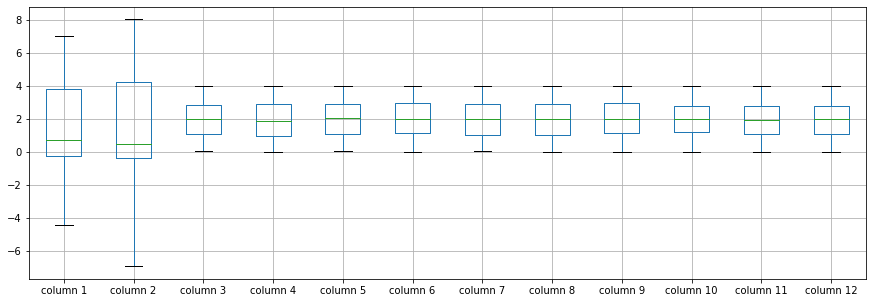

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.503101
column 2     1.282324
column 3     1.978445
column 4     1.934553
column 5     1.995572
column 6     2.007014
column 7     1.960268
column 8     1.991316
column 9     2.014135
column 10    1.987301
column 11    1.939691
column 12    1.952980
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.366402,-0.009338,-0.005729,0.071256,0.051230,0.053365,0.054009,0.033552,0.048592,0.030518,0.008804
column 2,-0.366402,1.000000,0.013126,-0.026699,-0.020789,0.010952,0.003327,-0.016087,-0.011986,-0.065688,-0.124882,0.032424
column 3,-0.009338,0.013126,1.000000,0.004893,0.060852,-0.030303,-0.028915,-0.038056,-0.004043,0.031863,-0.083796,0.049345
column 4,-0.005729,-0.026699,0.004893,1.000000,0.018169,-0.026515,0.075914,0.048091,0.002868,0.043300,0.020880,-0.008140
column 5,0.071256,-0.020789,0.060852,0.018169,1.000000,0.001332,0.041105,0.040083,0.024830,-0.066413,0.013851,0.015236
column 6,0.051230,0.010952,-0.030303,-0.026515,0.001332,1.000000,-0.040021,0.046348,0.013857,0.047728,-0.012756,-0.050116
column 7,0.053365,0.003327,-0.028915,0.075914,0.041105,-0.040021,1.000000,0.033928,-0.022139,-0.112476,-0.029625,0.024091
column 8,0.054009,-0.016087,-0.038056,0.048091,0.040083,0.046348,0.033928,1.000000,-0.087951,-0.046380,0.019067,-0.033621
column 9,0.033552,-0.011986,-0.004043,0.002868,0.024830,0.013857,-0.022139,-0.087951,1.000000,0.075892,-0.004339,-0.018884
column 10,0.048592,-0.065688,0.031863,0.043300,-0.066413,0.047728,-0.112476,-0.046380,0.075892,1.000000,-0.208526,0.067289


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+102,12+102+102,12+102+102+102,12+102+102+102+102,12+102+102+102+102+102,12+102+102+102+102+102+102,12+102+102+102+102+102,12+102+102+102+102,12+102+102+102,12+102+102,12+102,12], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.97340747833252
Epoch: 1 , loss: 20.738430786132813
Epoch: 2 , loss: 18.87205472946167
Epoch: 3 , loss: 18.732135696411135
Epoch: 4 , loss: 18.401597232818602
Epoch: 5 , loss: 18.131048278808592
Epoch: 6 , loss: 17.87440773010254
Epoch: 7 , loss: 17.411345176696777
Epoch: 8 , loss: 17.363935413360597
Epoch: 9 , loss: 16.92339235305786
Epoch: 10 , loss: 16.7553694152832
Epoch: 11 , loss: 16.57646339416504
Epoch: 12 , loss: 16.111132106781007
Epoch: 13 , loss: 16.072408981323242
Epoch: 14 , loss: 15.859573154449462
Epoch: 15 , loss: 15.913545875549316
Epoch: 16 , loss: 15.627511558532715
Epoch: 17 , loss: 15.67769187927246
Epoch: 18 , loss: 15.524270629882812
Epoch: 19 , loss: 15.399073867797851
Epoch: 20 , loss: 15.16822057723999
Epoch: 21 , loss: 15.228528804779053
Epoch: 22 , loss: 15.18694387435913
Epoch: 23 , loss: 15.076619205474854
Epoch: 24 , loss: 15.08949312210083
Epoch: 25 , loss: 15.0273015

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.961649
column 12    0.959479
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.0,0.00000,0.000000,1.660176,0.0,0.000000,-0.366352,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.00000,1.366227,0.000000,0.0,0.000000,0.000000,-1.183281,0.000000,0.000000
2,1.273773,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.002298,0.000000
3,0.000000,0.000000,0.0,0.00000,-1.193683,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.038888,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.824803,0.000000,0.0,0.00000,0.000000,0.000000,0.0,-1.984796,0.000000,0.000000,0.000000,1.203110
796,0.000000,0.000000,0.0,0.00000,0.000000,-1.461584,0.0,0.000000,-1.631736,0.000000,-1.676947,-0.461387
797,0.000000,3.282543,0.0,-0.81189,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
798,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.935046,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(99.4258762415642, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.40055221913476197

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     2.339900
column 4     1.794800
column 5     1.401300
column 6     1.472102
column 7     1.304100
column 8     1.249300
column 9     1.059400
column 10    1.284300
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,2.339256,3.43440,2.792400,2.409948,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,1.790947,1.178500,1.68020,1.388800,3.216700,1.740319,0.772910,0.641450
2,1.104313,0.501530,2.470900,3.06500,1.567600,1.482400,0.92160,2.642400,1.518700,2.531800,1.430502,1.876800
3,-0.136050,0.472790,0.588090,1.95630,1.593317,2.595700,2.89330,1.537500,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.63120,3.554100,2.271100,0.37425,2.178600,1.314000,1.063200,1.065788,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.944197,-2.686700,1.576000,0.55612,0.070769,2.074700,0.80304,1.238104,3.493300,1.325500,3.231100,1.208497
796,3.466600,-4.034600,3.100400,1.34610,1.377300,0.827116,0.39613,2.396100,0.831764,1.667500,0.784753,0.765313
797,3.344800,0.898243,2.031000,1.45271,3.341200,1.537000,1.22560,0.740270,2.495400,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.84400,1.098700,3.424300,0.81081,3.727000,1.187900,0.951120,2.819546,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NL_20(imp).xlsx", index=False, header=False)